<a href="https://colab.research.google.com/github/sinha96/kaggel_dataset_analysis/blob/master/Botson_crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
data = pd.read_csv('/content/drive/My Drive/crimes-in-boston/crime.csv', encoding='latin-1')
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [6]:
data_code = pd.read_csv('/content/drive/My Drive/crimes-in-boston/offense_codes.csv', encoding='latin-1')
data_code.head()

,CODE,NAME
0,612,LARCENY PURSE SNATCH - NO FORCE
1,613,LARCENY SHOPLIFTING
2,615,LARCENY THEFT OF MV PARTS & ACCESSORIES
3,1731,INCEST
4,3111,LICENSE PREMISE VIOLATION


In [7]:
round(data.isnull().sum()/data.shape[0]*100,2)

INCIDENT_NUMBER         0.00
OFFENSE_CODE            0.00
OFFENSE_CODE_GROUP      0.00
OFFENSE_DESCRIPTION     0.00
DISTRICT                0.55
REPORTING_AREA          0.00
SHOOTING               99.68
OCCURRED_ON_DATE        0.00
YEAR                    0.00
MONTH                   0.00
DAY_OF_WEEK             0.00
HOUR                    0.00
UCR_PART                0.03
STREET                  3.41
Lat                     6.27
Long                    6.27
Location                0.00
dtype: float64

In [0]:
data.drop(['SHOOTING','Location','OCCURRED_ON_DATE'],axis=1,inplace=True)

In [9]:
data.shape

(319073, 16)

In [11]:
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371
1,I182070943,1402,Vandalism,VANDALISM,C11,347,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361


In [20]:
data.YEAR.value_counts()

2017    100886
2016     99114
2018     65685
2015     53388
Name: YEAR, dtype: int64

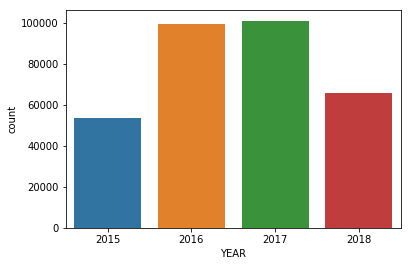

In [23]:
sns.countplot(data.YEAR)

## Crime rate in 2016 shoots up by 46.13%

In [25]:
round((data.YEAR.value_counts().loc[2016] - data.YEAR.value_counts().loc[2015])/data.YEAR.value_counts().loc[2016] * 100,2)

46.13

## Crime rate in 2017 increased by 1.76% 

In [26]:
round((data.YEAR.value_counts().loc[2017] - data.YEAR.value_counts().loc[2016])/data.YEAR.value_counts().loc[2017] * 100,2)

1.76

## Crime rate decreased by 53.59%

In [27]:
round((data.YEAR.value_counts().loc[2018] - data.YEAR.value_counts().loc[2017])/data.YEAR.value_counts().loc[2018] * 100,2)

-53.59

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]),
 <a list of 67 Text xticklabel objects>)

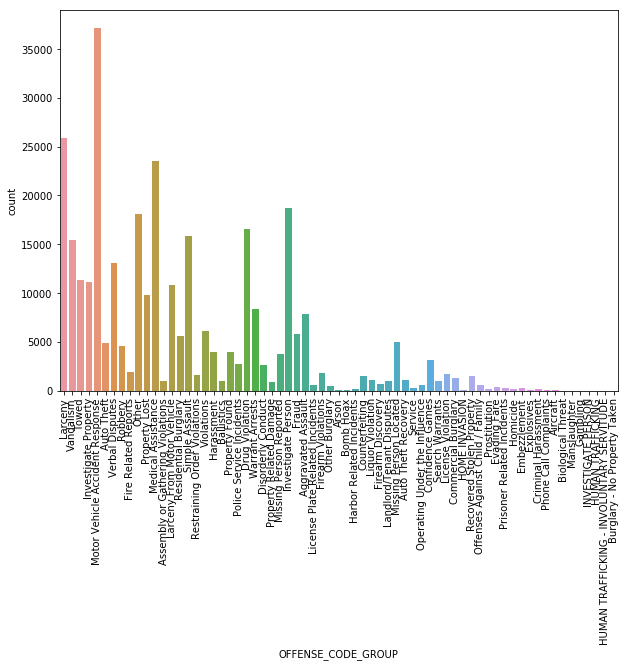

In [29]:
fig = plt.figure(figsize=(10,7))

sns.countplot(data.OFFENSE_CODE_GROUP)
plt.xticks(rotation=90)

Text(-8.949999999999989, 0.5, 'Count')

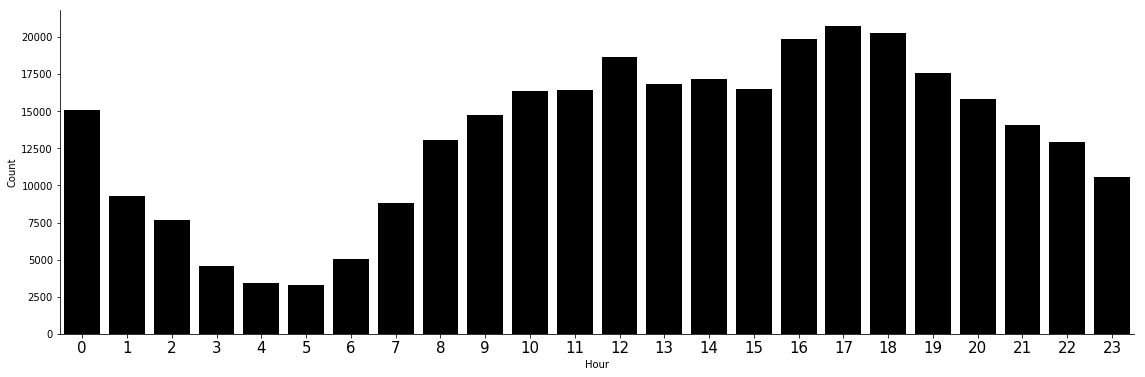

In [37]:
sns.catplot(x='HOUR',
           kind='count',
            height=5.27, 
            aspect=3,
            color='black',
           data=data)
plt.xticks(size=15)
plt.yticks(size=10)
plt.xlabel('Hour', fontsize=10)
plt.ylabel('Count', fontsize=10)

Text(-8.699999999999989, 0.5, 'Count')

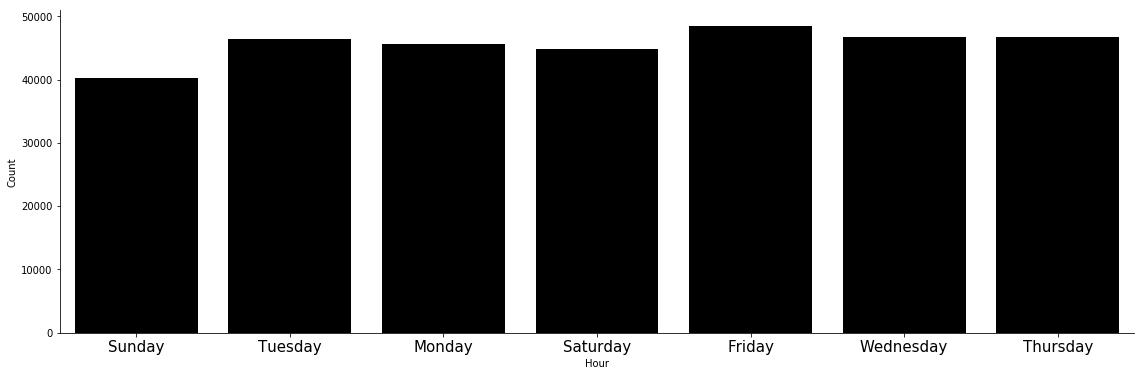

In [38]:
sns.catplot(x='DAY_OF_WEEK',
           kind='count',
            height=5.27, 
            aspect=3,
            color='black',
           data=data)
plt.xticks(size=15)
plt.yticks(size=10)
plt.xlabel('Day', fontsize=10)
plt.ylabel('Count', fontsize=10)

Text(-8.824999999999989, 0.5, 'Count')

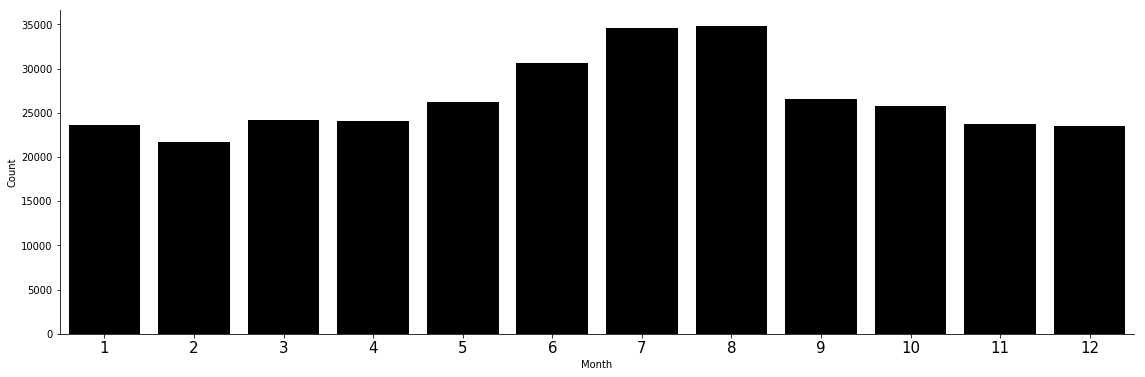

In [40]:
sns.catplot(x='MONTH',
           kind='count',
            height=5.27, 
            aspect=3,
            color='black',
           data=data)
plt.xticks(size=15)
plt.yticks(size=10)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Count', fontsize=10)

Text(-8.699999999999989, 0.5, 'Count')

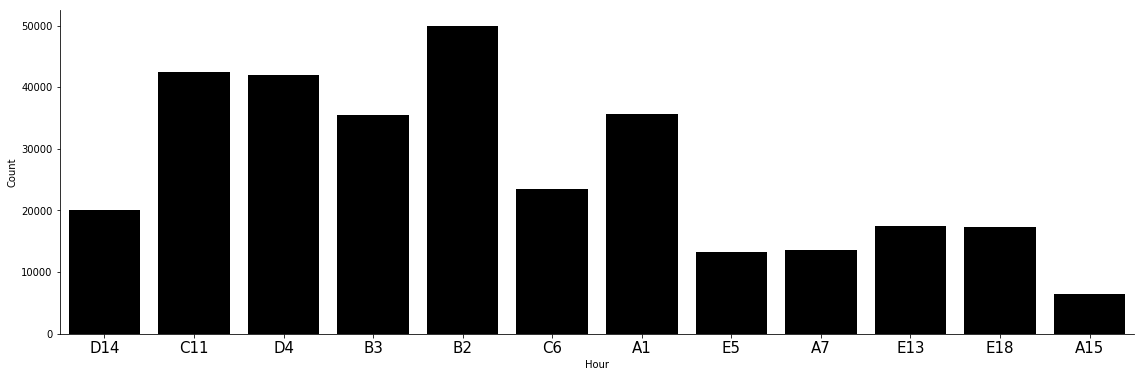

In [53]:
sns.catplot(x='DISTRICT',
           kind='count',
            height=5.27, 
            aspect=3,
            color='black',
           data=data)
plt.xticks(size=15)
plt.yticks(size=10)
plt.xlabel('Hour', fontsize=10)
plt.ylabel('Count', fontsize=10)

## Top crimes that are most likey to get occur and reported

In [52]:
top_crime = pd.DataFrame(data['OFFENSE_CODE'].value_counts()).merge(data_code,left_index=True,right_on='CODE',how='inner')[:10]
top_crime

,OFFENSE_CODE,CODE,NAME
66,18783,3006,SICK/INJURED/MEDICAL - PERSON
495,18783,3006,SICK/INJURED/MEDICAL - PERSON
151,18754,3115,INVESTIGATE PERSON
427,18754,3115,INVESTIGATE PERSON
180,16323,3831,M/V - LEAVING SCENE - PROPERTY DAMAGE
79,15154,1402,VANDALISM
520,15154,1402,VANDALISM
91,14799,802,ASSAULT SIMPLE - BATTERY
336,14799,802,ASSAULT & BATTERY
81,13099,3301,VERBAL DISPUTE


In [0]:
crime_report = data[['YEAR','OFFENSE_CODE','INCIDENT_NUMBER']].groupby(['YEAR','OFFENSE_CODE'],as_index=False).count().sort_values(by=['YEAR','INCIDENT_NUMBER'],ascending=False)

In [70]:
crime_report.merge(data_code,left_on='OFFENSE_CODE',right_on='CODE',how='inner')

,YEAR,OFFENSE_CODE,INCIDENT_NUMBER,CODE,NAME
0,2018,3006,4627,3006,SICK/INJURED/MEDICAL - PERSON
1,2018,3006,4627,3006,SICK/INJURED/MEDICAL - PERSON
2,2017,3006,6277,3006,SICK/INJURED/MEDICAL - PERSON
3,2017,3006,6277,3006,SICK/INJURED/MEDICAL - PERSON
4,2016,3006,5495,3006,SICK/INJURED/MEDICAL - PERSON
5,2016,3006,5495,3006,SICK/INJURED/MEDICAL - PERSON
6,2015,3006,2384,3006,SICK/INJURED/MEDICAL - PERSON
7,2015,3006,2384,3006,SICK/INJURED/MEDICAL - PERSON
8,2018,3115,3818,3115,INVESTIGATE PERSON
9,2018,3115,3818,3115,INVESTIGATE PERSON


In [73]:
crime_report[crime_report.YEAR == 2018]

,YEAR,OFFENSE_CODE,INCIDENT_NUMBER
720,2018,3006,4627
734,2018,3115,3818
772,2018,3831,3383
627,2018,802,3296
749,2018,3301,3055
639,2018,1402,2768
756,2018,3410,2554
733,2018,3114,2529
743,2018,3201,2005
705,2018,2647,1993


Text(-15.074999999999989, 0.5, 'Count')

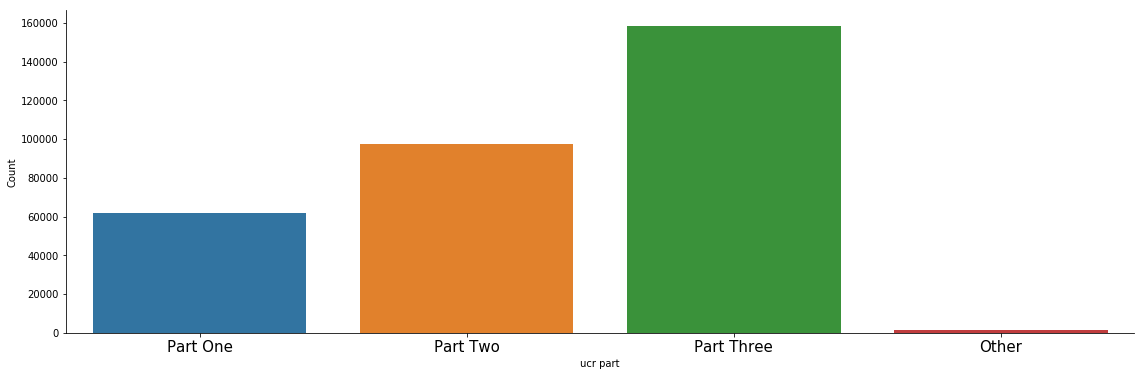

In [76]:
sns.catplot(x='UCR_PART',
           kind='count',
            height=5.27, 
            aspect=3,
            data=data)
plt.xticks(size=15)
plt.yticks(size=10)
plt.xlabel('ucr part', fontsize=10)
plt.ylabel('Count', fontsize=10)